<a href="https://colab.research.google.com/github/misiek447/merito-2025/blob/main/kaggle%20file%20newest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# 1. Import niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (opcjonalnie, do wstępnej wizualizacji)
import seaborn as sns

# ustawienia dla czytelnych wykresów
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [91]:
import pandas as pd

# 1.1 Wczytanie pliku z mapowaniem
mapping = pd.read_csv('/content/former_names.csv')  # dostosuj ścieżkę

# 1.2 Zbudowanie słownika {former: current}
former_to_current = dict(zip(mapping['former'], mapping['current']))

# 1.3 Szybka weryfikacja
print(len(former_to_current), "wpisów w mapowaniu.")
list(former_to_current.items())[:5]


34 wpisów w mapowaniu.


[('Dahomey', 'Benin'),
 ('Upper Volta', 'Burkina Faso'),
 ('Netherlands Antilles', 'Curaçao'),
 ('Bohemia', 'Czechoslovakia'),
 ('Bohemia and Moravia', 'Czechoslovakia')]

In [92]:
# 2.1. Wczytanie pliku CSV do DataFrame
df = pd.read_csv('/content/results.csv')   # lub ścieżka, pod którą wrzuciłeś plik

df['isNeutral'] = df['neutral'].astype(int)

# 2.2. Rzut oka na strukturę danych
print(df.shape)        # ile wierszy i kolumn?
df.info()              # typy kolumn i braki danych
display(df.head(5))    # pierwsze 5 wierszy

# 2.3. Podstawowe statystyki opisowe
display(df.describe(include='all'))

(48207, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48207 entries, 0 to 48206
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48207 non-null  object
 1   home_team   48207 non-null  object
 2   away_team   48207 non-null  object
 3   home_score  48207 non-null  int64 
 4   away_score  48207 non-null  int64 
 5   tournament  48207 non-null  object
 6   city        48207 non-null  object
 7   country     48207 non-null  object
 8   neutral     48207 non-null  bool  
 9   isNeutral   48207 non-null  int64 
dtypes: bool(1), int64(3), object(6)
memory usage: 3.4+ MB


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,isNeutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,0


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,isNeutral
count,48207,48207,48207,48207.000000,48207.000000,48207,48207,48207,48207,48207.000000
unique,16298,324,317,NaN,NaN,182,2096,268,2,NaN
top,2012-02-29,Brazil,Uruguay,NaN,NaN,Friendly,Kuala Lumpur,United States,False,NaN
freq,66,606,576,NaN,NaN,18070,732,1415,35515,NaN
mean,NaN,NaN,NaN,1.759890,1.182048,NaN,NaN,NaN,NaN,0.263281
std,NaN,NaN,NaN,1.774537,1.401071,NaN,NaN,NaN,NaN,0.440418
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000


In [93]:
# --- Unifikacja nazw państw/drużyn ---
# 1.2 Zbudowanie słownika {former: current} (już masz mapping)
former_to_current = dict(zip(mapping['former'], mapping['current']))

# 2. Zastąp nazwy w głównym DataFrame
def unify_name(name):
    return former_to_current.get(name, name)

for col in ['home_team', 'away_team', 'country']:
    df[col] = df[col].apply(unify_name)


In [94]:
print("Przykładowe nowe nazwy drużyn/państw:")
print(df[['home_team','away_team','country']].drop_duplicates().sample(5, random_state=42))

Przykładowe nowe nazwy drużyn/państw:
         home_team             away_team   country
47823  Timor-Leste                Brunei  Thailand
15623         Mali          Sierra Leone    Guinea
1007        Turkey                Russia    Turkey
6514      DR Congo                 Ghana   Tunisia
14092         Iraq  United Arab Emirates      Oman


In [95]:
# 1. Konwersja kolumny date na datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Sprawdźmy, czy konwersja się powiodła
print(df['date'].dtype)
print(df['date'].min(), '–', df['date'].max())

# 2. Eksploracja wartości w kolumnie tournament
tourn_counts = df['tournament'].value_counts()
display(tourn_counts.head(10))    # Top 10 najczęstszych turniejów
print(f"Łącznie odnotowaliśmy {len(tourn_counts)} unikalnych turniejów.")

# (opcjonalnie) zobaczmy, ile meczów towarzyskich vs World Cup
friendly_games = tourn_counts.get('Friendly', 0)
worldcup_games = tourn_counts.filter(like='World Cup').sum()
print(f"Mecze towarzyskie: {friendly_games}")
print(f"Mecze World Cup (wszystkie edycje): {worldcup_games}")

datetime64[ns]
1872-11-30 00:00:00 – 2025-03-25 00:00:00


,count
tournament,
Friendly,18070
FIFA World Cup qualification,8367
UEFA Euro qualification,2824
African Cup of Nations qualification,2278
FIFA World Cup,964
Copa América,869
African Cup of Nations,793
AFC Asian Cup qualification,782
UEFA Nations League,654


Łącznie odnotowaliśmy 182 unikalnych turniejów.
Mecze towarzyskie: 18070
Mecze World Cup (wszystkie edycje): 9391


In [96]:
# Wyfiltrujmy unikalne nazwy zawierające "World Cup" i "Euro"
wc_names = [name for name in df['tournament'].unique() if "World Cup" in name]
eu_names = [name for name in df['tournament'].unique() if "Euro" in name]
asia_names = [name for name in df['tournament'].unique() if "Asian" in name]
africa_names = [name for name in df['tournament'].unique() if "African" in name]
print("World Cup:", wc_names)
print("Euro:", eu_names)
print("Asia:", asia_names)
print("Africa:", africa_names)


World Cup: ['FIFA World Cup', 'FIFA World Cup qualification', 'Viva World Cup']
Euro: ['Central European International Cup', 'UEFA Euro qualification', 'UEFA Euro', 'CONIFA European Football Cup']
Asia: ['Asian Games', 'AFC Asian Cup qualification', 'AFC Asian Cup', 'Southeast Asian Peninsular Games', 'Southeast Asian Games', 'South Asian Games', 'East Asian Games', 'Afro-Asian Games']
Africa: ['African Cup of Nations', 'African Friendship Games', 'African Cup of Nations qualification', 'All-African Games', 'West African Cup']


In [97]:
# Zamieńmy błędnie zakodowane "Copa AmÃ©rica" na "Copa América"
df['tournament'] = df['tournament'].str.replace(
    'Copa AmÃ©rica',
    'Copa América',
    regex=False
)


In [98]:
# 2.1 Zdefiniujmy listy nazw finałów
final_wc = ["FIFA World Cup"]       # dopisz dokładne nazwy z kroku wyżej, jeśli się różnią
final_euro = ["UEFA Euro"]
final_amer  = ["Copa América"]
final_africa = ["African Cup of Nations"]
final_asia = ["AFC Asian Cup"]
# final_concacaf = ["Gold Cup"]


# 2.2 Dodaj kolumny
df['is_friendly'] = (df['tournament'] == "Friendly").astype(int)
df['is_major'] = df['tournament'].isin(final_wc + final_euro + final_amer + final_africa + final_asia).astype(int)

# 2.3 Sprawdźmy nowe podziały
print("Mecze towarzyskie:", df['is_friendly'].sum())
print("Mecze finałów World Cup + Euro + Copa America + Asian Cup + African Cup:", df['is_major'].sum())

Mecze towarzyskie: 18070
Mecze finałów World Cup + Euro + Copa America + Asian Cup + African Cup: 3435


In [99]:
# 3.1. Dodajemy kolumnę year
df['year'] = df['date'].dt.year

# 3.2. Filtrowanie meczów finałów (World Cup + Euro)
majors = df[df['is_major'] == 1].copy()

print("Liczba meczów finałowych po filtrowaniu:", majors.shape[0])
majors['tournament'].value_counts()

Liczba meczów finałowych po filtrowaniu: 3435


,count
tournament,
FIFA World Cup,964
Copa América,869
African Cup of Nations,793
AFC Asian Cup,421
UEFA Euro,388


In [100]:
# 4.1. Funkcja do wyliczenia punktów i bramek z jednego meczu
def compute_outcome(row, team_col_prefix):
    # team_col_prefix: "home" lub "away"
    goals_for = row[f'{team_col_prefix}_score']
    goals_against = row[f'{"away" if team_col_prefix=="home" else "home"}_score']
    if goals_for > goals_against:
        pts = 3
        w, d, l = 1, 0, 0
    elif goals_for == goals_against:
        pts = 1
        w, d, l = 0, 1, 0
    else:
        pts = 0
        w, d, l = 0, 0, 1
    return pd.Series({
        'team': row[f'{team_col_prefix}_team'],
        'year': row['year'],
        'points': pts,
        'win': w,
        'draw': d,
        'loss': l,
        'goals_for': goals_for,
        'goals_against': goals_against
    })

# 4.2. Rozbijamy każdy mecz na dwa wiersze: jedna dla drużyny gospodarzy, druga dla gości
home_stats = majors.apply(lambda r: compute_outcome(r, 'home'), axis=1)
away_stats = majors.apply(lambda r: compute_outcome(r, 'away'), axis=1)

team_matches = pd.concat([home_stats, away_stats], ignore_index=True)

# 4.3. Agregacja po (team, year)
agg = team_matches.groupby(['team','year']).agg(
    matches_played = ('points', 'size'),
    wins           = ('win', 'sum'),
    draws          = ('draw', 'sum'),
    losses         = ('loss', 'sum'),
    total_points   = ('points', 'sum'),
    goals_for      = ('goals_for', 'sum'),
    goals_against  = ('goals_against', 'sum'),
).reset_index()

agg['avg_points'] = agg['total_points'] / agg['matches_played']
agg['goal_diff']  = agg['goals_for'] - agg['goals_against']

# 4.4. Rzut oka na wynik
display(agg.head())
print("Liczba obserwacji (team,year):", agg.shape[0])


,team,year,matches_played,wins,draws,losses,total_points,goals_for,goals_against,avg_points,goal_diff
0,Albania,2016,3,1,0,2,3,1,3,1.000000,-2
1,Albania,2024,3,0,1,2,1,3,5,0.333333,-2
2,Algeria,1968,3,1,0,2,3,5,6,1.000000,-1
3,Algeria,1980,5,2,2,1,8,6,7,1.600000,-1
4,Algeria,1982,8,4,1,3,13,10,11,1.625000,-1


Liczba obserwacji (team,year): 1643


In [101]:
# 5.1. Filtrowanie meczów towarzyskich
friendlies = df[df['is_friendly'] == 1].copy()

# Przekształcamy je jak wcześniej – każda drużyna jako osobny wiersz
home_f = friendlies.apply(lambda r: compute_outcome(r, 'home'), axis=1)
away_f = friendlies.apply(lambda r: compute_outcome(r, 'away'), axis=1)
friendlies_expanded = pd.concat([home_f, away_f], ignore_index=True)
friendlies_expanded['date'] = df.loc[friendlies_expanded.index, 'date'].values


In [102]:
# 5.2. Funkcja, która dla każdej drużyny i roku zbierze statystyki z ostatnich 12 mies.
def get_friendly_stats(team, year):
    start_date = pd.Timestamp(year=year-1, month=6, day=1)
    end_date   = pd.Timestamp(year=year, month=6, day=1)

    mask = (
        (friendlies_expanded['team'] == team) &
        (friendlies_expanded['date'] >= start_date) &
        (friendlies_expanded['date'] < end_date)
    )
    df_f = friendlies_expanded.loc[mask]

    if df_f.empty:
        return pd.Series({
            'friendly_matches': 0,
            'friendly_win_rate': np.nan,
            'friendly_goal_diff_avg': np.nan
        })

    return pd.Series({
        'friendly_matches': len(df_f),
        'friendly_win_rate': df_f['win'].sum() / len(df_f),
        'friendly_goal_diff_avg': (df_f['goals_for'] - df_f['goals_against']).mean()
    })

# 5.3. Obliczanie cech
features = agg.apply(lambda row: get_friendly_stats(row['team'], row['year']), axis=1)

# 5.4. Scalanie z agregatem
dataset = pd.concat([agg, features], axis=1)

# Usuwamy wiersze bez danych towarzyskich (jeśli nie chcemy imputować)
dataset.dropna(subset=['friendly_win_rate'], inplace=True)

# Podgląd
display(dataset.head())


,team,year,matches_played,wins,draws,losses,total_points,goals_for,goals_against,avg_points,goal_diff,friendly_matches,friendly_win_rate,friendly_goal_diff_avg
2,Algeria,1968,3,1,0,2,3,5,6,1.000,-1,1.0,1.00,3.00
3,Algeria,1980,5,2,2,1,8,6,7,1.600,-1,4.0,0.25,-1.00
4,Algeria,1982,8,4,1,3,13,10,11,1.625,-1,4.0,0.75,0.75
5,Algeria,1984,5,3,2,0,11,8,1,2.200,7,1.0,1.00,1.00
6,Algeria,1986,6,0,3,3,3,3,8,0.500,-5,1.0,1.00,2.00


In [103]:
# 1. Filtrowanie meczów kwalifikacyjnych
quals = df[df['tournament'].str.contains("qualification")].copy()

# 2. Rozbijamy każdy mecz na dwa wiersze i od razu dołączamy datę
def compute_outcome_with_date(row, side):
    # side = 'home' lub 'away'
    goals_for    = row[f'{side}_score']
    goals_away   = row[f'{"away" if side=="home" else "home"}_score']
    if goals_for > goals_away:
        pts, w, d, l = 3, 1, 0, 0
    elif goals_for == goals_away:
        pts, w, d, l = 1, 0, 1, 0
    else:
        pts, w, d, l = 0, 0, 0, 1
    return {
        'team':            row[f'{side}_team'],
        'date':            row['date'],
        'points':          pts,
        'win':             w,
        'draw':            d,
        'loss':            l,
        'goals_for':       goals_for,
        'goals_against':   goals_away
    }

home_q = quals.apply(lambda r: compute_outcome_with_date(r, 'home'), axis=1)
away_q = quals.apply(lambda r: compute_outcome_with_date(r, 'away'), axis=1)

quals_expanded = pd.DataFrame(home_q.tolist() + away_q.tolist())

# 3. Szybkie sprawdzenie
print(quals_expanded.columns)   # powinny być: team, date, points, win, draw, loss, goals_for, goals_against
print("Liczba wierszy w bolsze:", quals_expanded.shape)


Index(['team', 'date', 'points', 'win', 'draw', 'loss', 'goals_for',
       'goals_against'],
      dtype='object')
Liczba wierszy w bolsze: (30900, 8)


In [104]:
# 4. Funkcja zbierająca statystyki kwalifikacji
def get_qual_stats(team, year):
    start = pd.Timestamp(year=year-1, month=6, day=1)
    end   = pd.Timestamp(year=year,   month=6, day=1)
    mask = (
        (quals_expanded['team'] == team) &
        (quals_expanded['date'] >= start) &
        (quals_expanded['date'] <  end)
    )
    df_q = quals_expanded.loc[mask]
    if df_q.empty:
        return pd.Series({
            'qual_matches':        0,
            'qual_win_rate':     np.nan,
            'qual_goal_diff_avg': np.nan
        })
    return pd.Series({
        'qual_matches':      len(df_q),
        'qual_win_rate':     df_q['win'].sum() / len(df_q),
        'qual_goal_diff_avg': (df_q['goals_for'] - df_q['goals_against']).mean()
    })

# 5. Dodanie tych cech do 'agg' i stworzenie nowego dataset_ext
qual_feats = agg.apply(lambda r: get_qual_stats(r['team'], r['year']), axis=1)
dataset_ext = pd.concat([dataset, qual_feats], axis=1)
dataset_ext.dropna(subset=['friendly_win_rate','qual_win_rate'], inplace=True)

display(dataset_ext.head())


,team,year,matches_played,wins,draws,losses,total_points,goals_for,goals_against,avg_points,goal_diff,friendly_matches,friendly_win_rate,friendly_goal_diff_avg,qual_matches,qual_win_rate,qual_goal_diff_avg
3,Algeria,1980.0,5.0,2.0,2.0,1.0,8.0,6.0,7.0,1.600,-1.0,4.0,0.25,-1.00,3.0,0.333333,0.333333
4,Algeria,1982.0,8.0,4.0,1.0,3.0,13.0,10.0,11.0,1.625,-1.0,4.0,0.75,0.75,4.0,0.750000,2.500000
5,Algeria,1984.0,5.0,3.0,2.0,0.0,11.0,8.0,1.0,2.200,7.0,1.0,1.00,1.00,2.0,0.500000,1.000000
6,Algeria,1986.0,6.0,0.0,3.0,3.0,3.0,3.0,8.0,0.500,-5.0,1.0,1.00,2.00,6.0,0.833333,2.000000
7,Algeria,1988.0,5.0,1.0,3.0,1.0,6.0,4.0,4.0,1.200,0.0,4.0,1.00,3.00,2.0,0.500000,1.500000


In [105]:
# --- 1. Przygotowanie cechy home advantage dla turniejów głównych ---

# 1.1 Filtrowanie meczów głównych
majors = df[df['is_major'] == 1].copy()
majors['year'] = majors['date'].dt.year

# 1.2 Funkcja outcome z informacją o typie meczu (home/away/neutral)
def compute_outcome_with_side(row, side):
    goals_for  = row[f'{side}_score']
    goals_opp  = row[f'{"away" if side=="home" else "home"}_score']
    if goals_for > goals_opp:
        pts, w, d, l = 3, 1, 0, 0
    elif goals_for == goals_opp:
        pts, w, d, l = 1, 0, 1, 0
    else:
        pts, w, d, l = 0, 0, 0, 1
    return {
        'team':          row[f'{side}_team'],
        'year':          row['year'],
        'points':        pts,
        'win':           w,
        'draw':          d,
        'loss':          l,
        'goals_for':     goals_for,
        'goals_against': goals_opp,
        'match_type':    'home' if row['isNeutral']==0 and side=='home'
                         else ('away' if row['isNeutral']==0 and side=='away'
                               else 'neutral')
    }

# 1.3 Rozwinięcie na dwie strony
home_m = majors.apply(lambda r: compute_outcome_with_side(r, 'home'), axis=1)
away_m = majors.apply(lambda r: compute_outcome_with_side(r, 'away'), axis=1)
majors_expanded = pd.DataFrame(home_m.tolist() + away_m.tolist())

# 1.4 Agregacja home/away/neutral
home_stats = majors_expanded.groupby(['team','year'])['match_type'] \
    .value_counts().unstack(fill_value=0) \
    .rename(columns={
        'home': 'major_home_matches',
        'away': 'major_away_matches',
        'neutral': 'major_neutral_matches'
    }).reset_index()

# 1.5 Wyliczenie proporcji meczów u siebie
home_stats['major_total_matches'] = (
    home_stats['major_home_matches'] +
    home_stats['major_away_matches'] +
    home_stats['major_neutral_matches']
)
home_stats['major_home_ratio'] = (
    home_stats['major_home_matches'] / home_stats['major_total_matches']
).fillna(0)

# 1.6 Połączenie z dataset_ext
dataset_adv = pd.merge(
    dataset_ext,
    home_stats[['team','year','major_home_ratio']],
    on=['team','year'],
    how='left'
).fillna({'major_home_ratio': 0})

# 1.7 Nowe cechy
feature_cols_adv = feature_cols + ['major_home_ratio']

# --- 2. Trening i ewaluacja z home_advantage ---

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 2.1 Przygotowanie X, y
X = dataset_adv[feature_cols_adv]
y = dataset_adv['avg_points']

# 2.2 Podział
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2.3 Pipeline
pipe_adv = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

# 2.4 Trenowanie
pipe_adv.fit(X_train, y_train)

# 2.5 Ewaluacja
y_pred = pipe_adv.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"With home_advantage → MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

# 2.6 Feature importance łącznie z home_advantage
import pandas as pd
importances = pipe_adv.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=feature_cols_adv).sort_values(ascending=False)
print("\nFeature importances:")
print(feat_imp)


With home_advantage → MAE: 0.580, RMSE: 0.724, R²: 0.063

Feature importances:
friendly_goal_diff_avg    0.233783
qual_goal_diff_avg        0.225577
friendly_matches          0.146443
friendly_win_rate         0.124250
qual_win_rate             0.123691
qual_matches              0.118923
major_home_ratio          0.027333
dtype: float64


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Przygotowanie X i y
feature_cols = [
    'friendly_matches','friendly_win_rate','friendly_goal_diff_avg',
    'qual_matches','qual_win_rate','qual_goal_diff_avg'
]
X = dataset_ext[feature_cols]
y = dataset_ext['avg_points']

# 2. Podział na train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Pipeline ze scalerem i RandomForest
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# 4. Trenowanie
pipe.fit(X_train, y_train)

# 5. Ewaluacja
y_pred = pipe.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2   = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")


MAE:  0.587
RMSE: 0.732
R²:   0.040


In [107]:
from sklearn.model_selection import train_test_split

# Wybieramy cechy i target
X = dataset_ext[['friendly_matches', 'friendly_win_rate', 'friendly_goal_diff_avg', 'qual_matches','qual_win_rate','qual_goal_diff_avg']]
y = dataset_ext['avg_points']   # regresja: przewidujemy średnią punktów

# Podział (70% trening, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Train samples: 464, Test samples: 200


In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# Trenowanie
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

MAE:  0.588
RMSE: 0.733


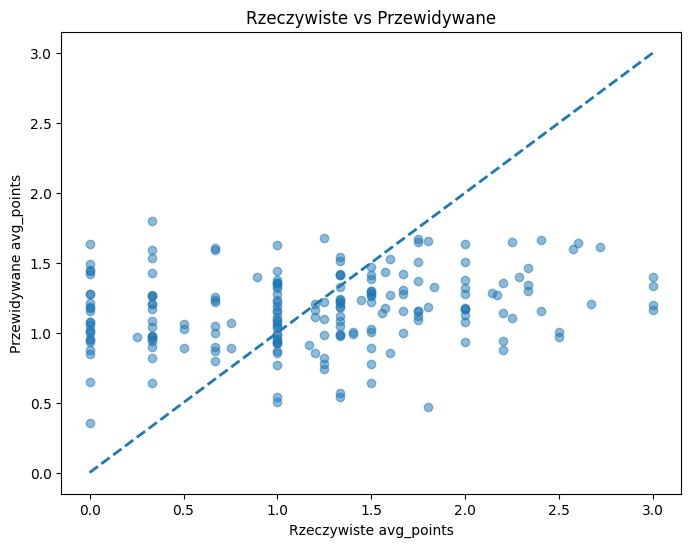

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Predykcje
y_pred = pipe.predict(X_test)

# Metryki
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)       # bez parametru squared
rmse = np.sqrt(mse)                             # wyciągamy pierwiastek

print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

# Wykres rzeczywiste vs. przewidywane
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         linestyle='--', linewidth=2)
plt.xlabel('Rzeczywiste avg_points')
plt.ylabel('Przewidywane avg_points')
plt.title('Rzeczywiste vs Przewidywane')
plt.show()



In [110]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")


R²: 0.038


In [111]:
import pandas as pd

# Wyciągnięcie feature importances z modelu RandomForest
importances = pipe.named_steps['model'].feature_importances_
feat_names = X.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
print(feat_imp)


friendly_goal_diff_avg    0.244408
qual_goal_diff_avg        0.232136
friendly_matches          0.150677
friendly_win_rate         0.131204
qual_win_rate             0.128896
qual_matches              0.112680
dtype: float64


In [112]:
from sklearn.model_selection import RandomizedSearchCV

# Zakres parametrów
param_dist = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

# Uruchom wyszukiwanie
rs.fit(X_train, y_train)

# Zobacz najlepsze parametry i osiągi
print("Best params:", rs.best_params_)
print("Best MAE (CV):", -rs.best_score_)


Best params: {'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_depth': 5}
Best MAE (CV): 0.5778902570247204


In [113]:
best_model = rs.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE test: ", mean_absolute_error(y_test, y_pred))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² test:  ", r2_score(y_test, y_pred))


MAE test:  0.5856776914630969
RMSE test: 0.7269868829133942
R² test:   0.054276587670211596


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lin = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
lin.fit(X_train, y_train)
y_lin = lin.predict(X_test)

print("Linear MAE:  ", mean_absolute_error(y_test, y_lin))
print("Linear RMSE: ", np.sqrt(mean_squared_error(y_test, y_lin)))
print("Linear R²:   ", r2_score(y_test, y_lin))


Linear MAE:   0.5805243623779336
Linear RMSE:  0.7261922113118303
Linear R²:    0.05634300400116332
